In [15]:
from itertools import chain
from functools import cache

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from settings import path
from load import *
from a1_features import get_common_feature, get_common_feature_dict

## Описание данных

Описание колонок файла с данными:

'region_name' – Регион

'city_name' – Населенный пункт

'cpe_manufacturer_name' – Производитель устройства

'cpe_model_name' – Модель устройства

'url_host' – Домен, с которого пришел рекламный запрос

'cpe_type_cd' – Тип устройства (смартфон или что-то другое)

'Cpe_model_os_type' – Операционка на устройстве

'price' – Оценка цены устройства

'date' – Дата

'part_of_day' – Время дня (утро, вечер, итд)

'request_cnt' – Число запросов одного пользователя за время дня (поле part_of_day)

'user_id' – ID пользователя

Описание колонок файла с таргетами:

'age' – Возраст пользователя

'Is_male' – Признак пользователя : мужчина (1-Да, 0-Нет)

'user_id' – ID пользователя

## Вспомогательные функции

In [4]:
@cache
def get_df_for_analysis():
    df = get_common_feature()
    t = load_target().dropna()
    users = np.intersect1d(df['user_id'], t['user_id'])
    t, df = t[t['user_id'].isin(users)], df[df['user_id'].isin(users)]
    t = t.loc[df['user_id']]
    t.index = df.index
    df = pd.concat([df.drop(columns='user_id'), t], axis=1)
    df['is_male'] = df['is_male'].astype('int32')
    df['age_bin'] = df['age_bin'].astype('int32')
    return df

def eval_sex_age_difference(df, eval_col, eval_target, elements_count):
    l = [pd.Series(chain(*df[df[eval_target] == i].groupby('user_id')[eval_col].agg(set))).value_counts() for i in df[eval_target].unique()]
    l = [lx / lx.sum() for lx in l]
    ll = [(l[i] - l[j]).abs().sort_values(ascending=False) for i in range(len(l) - 1) for j in range(i + 1, len(l))]
    return set(chain(*[x.index[:elements_count] for x in ll]))

def eval_both_difference(df, eval_col, elements_count=50):
    return np.array(eval_sex_age_difference(df, eval_col, 'is_male', elements_count) | eval_sex_age_difference(df, eval_col, 'age_bin', elements_count))

### URL

In [3]:
# %%time
# url = load_col('url_host')
# url = process_url(url)
# url.head(20)

### Дата

In [4]:
# %%time
# date = load_col('date').astype(np.datetime64)
# date.head(5)

### Производитель устройства

In [5]:
# %%time
# df = get_df_for_analysis()
# print('sex', eval_sex_age_difference(df, 'cpe_manufacturer_name', 'is_male', 10))
# print('age', eval_sex_age_difference(df, 'cpe_manufacturer_name', 'age_bin', 2))

### Поиск сайтов с различной аудиторией

In [6]:
%%time
df = get_df_for_analysis()
eval_both_difference(df, 2)

CPU times: total: 2min 33s
Wall time: 3min 13s


array({'mi7', 'trafficfactory', 'skwstat', 'weborama', 'tivizor', 'apteka', 'twitter', '24smi', 'ytimg', 'udipedia-new', 'sunlight', 'sbrf', 'infotime', 'googlesyndication', 'samsungapps', 't', 'zoon', 'kinomans', 'i-trailer', 'vz', 'filmskino', 'lookmeet', 'vazhno', 'viadata', 'gazeta', 'povar', 'buzzoola', 'adriver', 'ixbt', 'discord', 'zdorovcom', 'newzfeed', 'wargaming', 'advmusic', 'pluso', 'sdamgia', 'tass', 'rt', 'auto', 'qiwi', 'wi-fi', 'amazonaws', 'kinopoisk', 'discordapp', 'kinoaction', 'ampproject', 'profile', 'tinkoff', 'alfabank', 'mk', 'googleapis', 'teleprogramma', 'mos', 'howto-news', 'realsrv', 'prodoctorov', 'ftd', 'matchtv', 'pinimg', 'icloud', 'adwile', '1tv', 'vk', 'rambler', 'postupi', 'aviasales', 'moevideo', 'otzovik', 'avito', 'kinostream', 'google', 'razdvabm', 'sport24', 'wikipedia', 'gnezdo', 'leroymerlin', '1000', 'drive2', 'irecommend', 'sberbank', 'hh', 'drom', 'hhcdn', 'vtb', 'instagram', 'steamcommunity', 'adfox', 'gosuslugi', 'viqeo', 'ren', 'vgtrk', 

### Самые популярные сайты

In [7]:
%%time
df = get_df_for_analysis()
print(*df[2].value_counts().index[:50], sep="', '")

yandex', 'userapi', 'doubleclick', 'mail', 'vk', 'ytimg', 'yastatic', 'sberbank', 'apple', 'google', 'adfox', 'instagram', 'googlesyndication', 'adriver', 'ok', 'icloud', 'buzzoola', '2mdn', 'betweendigital', 'googleapis', 'relap', 'otm-r', 'tinkoff', 'rambler', 'gosuslugi', 'amazonaws', 'rtb', 'mts', 'avito', 'playreplay', 't', 'facebook', 'weborama', 'sape', 'mycdn', 'smi2', 'pinimg', 'lenta', 'bidvol', 'moevideo', 'sbrf', 'aliexpress', 'skwstat', 'vtb', 'duckduckgo', 'thesame', 'samsungapps', 'realsrv', 'twitter', 'hh
CPU times: total: 1.31 s
Wall time: 1.55 s


### Анализ преобразованных данных

In [5]:
%%time
df = get_df_for_analysis()
dfs = df.sample(200000)
df.head()

CPU times: total: 48.2 s
Wall time: 1min 58s


cpe_type_cd  request_cnt        date   price           cpe_model_name  \
0  smartphone            1  2021-06-24  2990.0  Galaxy J1 2016 LTE Dual   
1  smartphone            1  2021-06-28  2990.0  Galaxy J1 2016 LTE Dual   
2  smartphone            1  2021-06-23  2990.0  Galaxy J1 2016 LTE Dual   
3  smartphone            2  2021-06-22  2990.0  Galaxy J1 2016 LTE Dual   
4  smartphone            1  2021-07-03  2990.0  Galaxy J1 2016 LTE Dual   

  city_name region_name cpe_manufacturer_name part_of_day dow    1  \
0    Москва      Москва               Samsung         day   3  net   
1    Москва      Москва               Samsung     morning   0   ru   
2    Москва      Москва               Samsung         day   2  net   
3    Москва      Москва               Samsung         day   1  com   
4    Москва      Москва               Samsung     evening   5   ru   

             2 narod ucoz gov turbopages   age  is_male  user_id  age_bin  
0  doubleclick     0    0   0          0  35.0        0        0        2  
1           ok     0    0   0          0  35.0        0        0        2  
2       yandex     0    0   0          0  35.0        0        0        2  
3       google     0    0   0          0  35.0        0        0        2  
4        adfox     0    0   0          0  35.0        0        0        2

1. Регион играет малую роль
1. Цену следует оставить в качестве фичи
1. Количество запросов не играет роли
1. 1 домены играют роль

In [16]:
def temp(col1, col2, df=dfs, kind='line', hue='age_bin'):
    g = sns.relplot(data=df,
                x=col1,
                y=col2,
                hue=hue,
                kind=kind,
                aspect=5)
    g.set_xticklabels(rotation=45, horizontalalignment='right')
    plt.show()

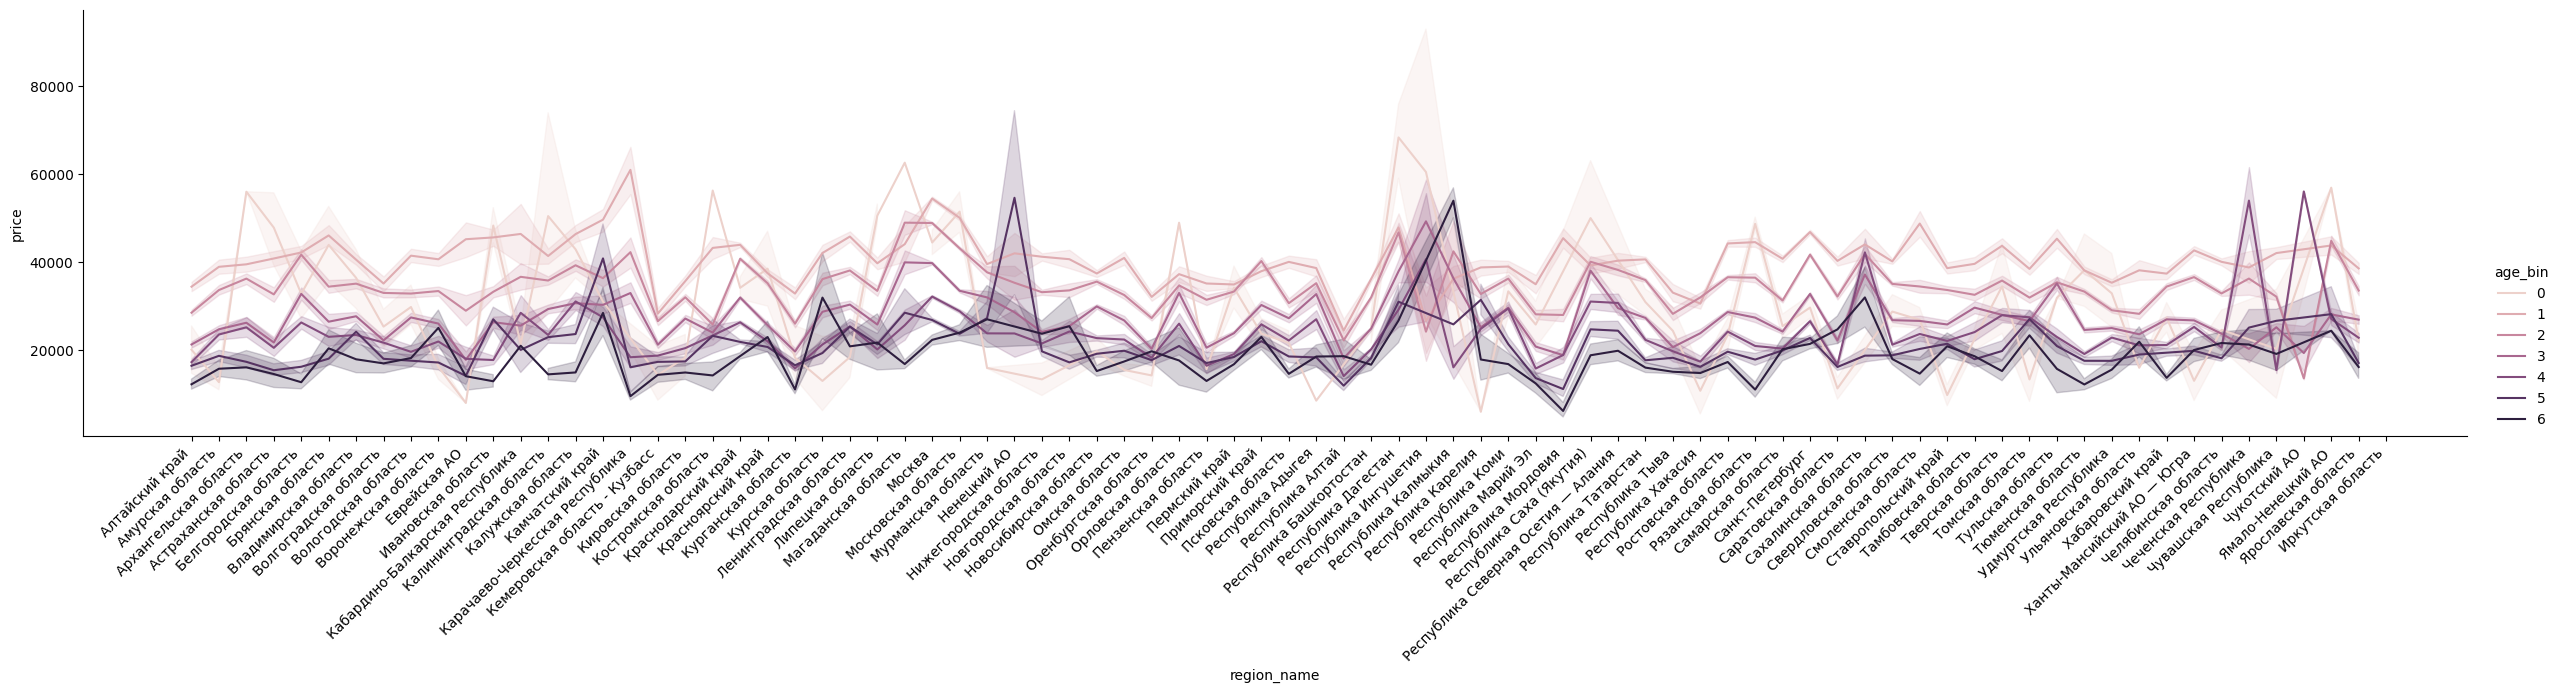

In [41]:
temp('region_name', 'price')

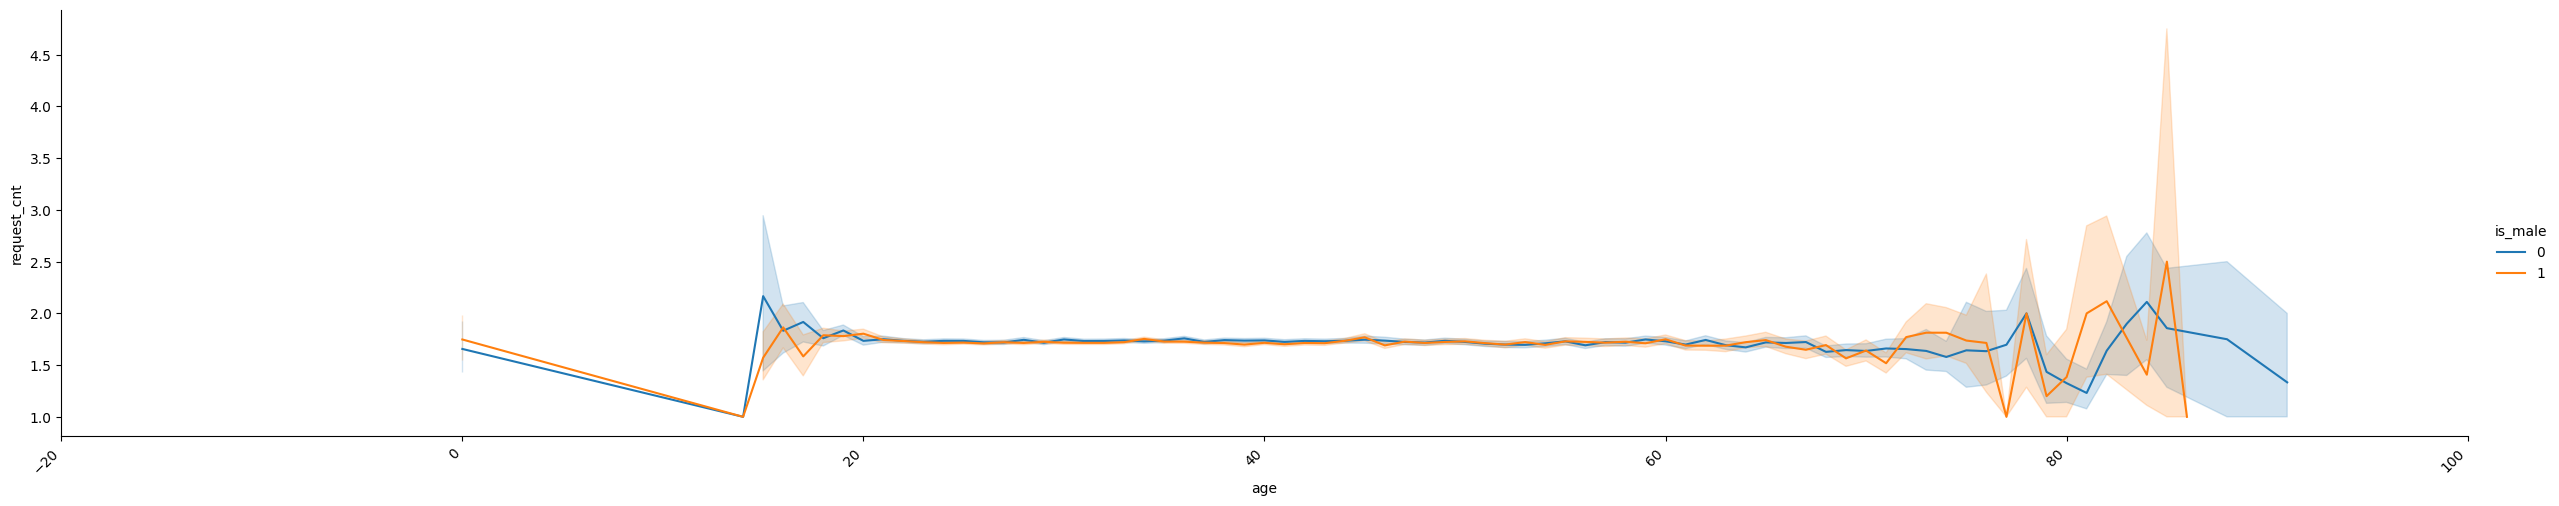

In [50]:
temp('age', 'request_cnt', hue='is_male')

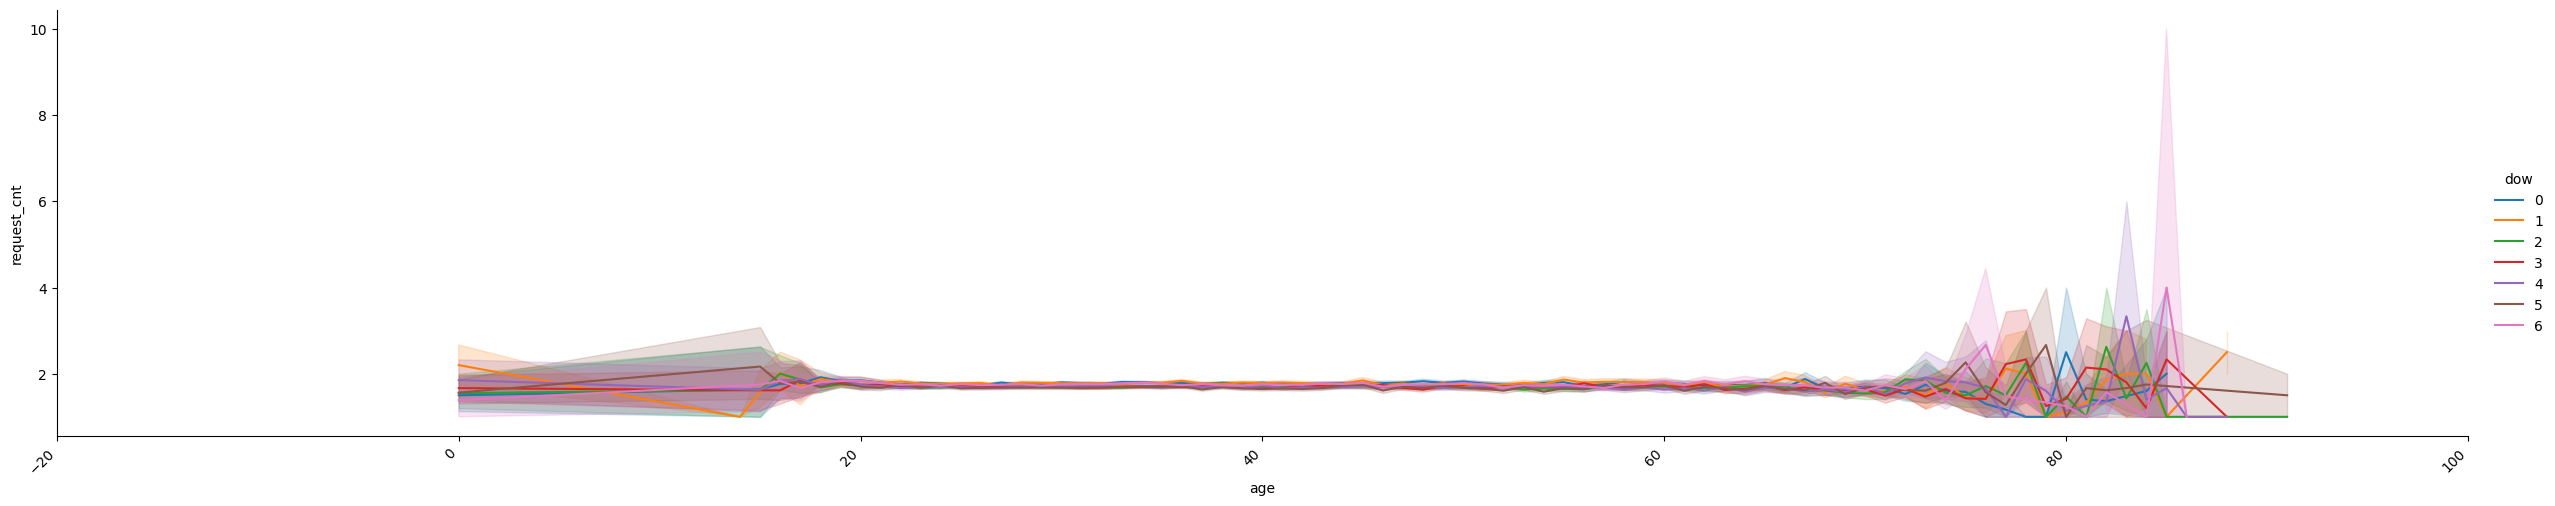

In [54]:
temp('age', 'request_cnt', hue='dow')

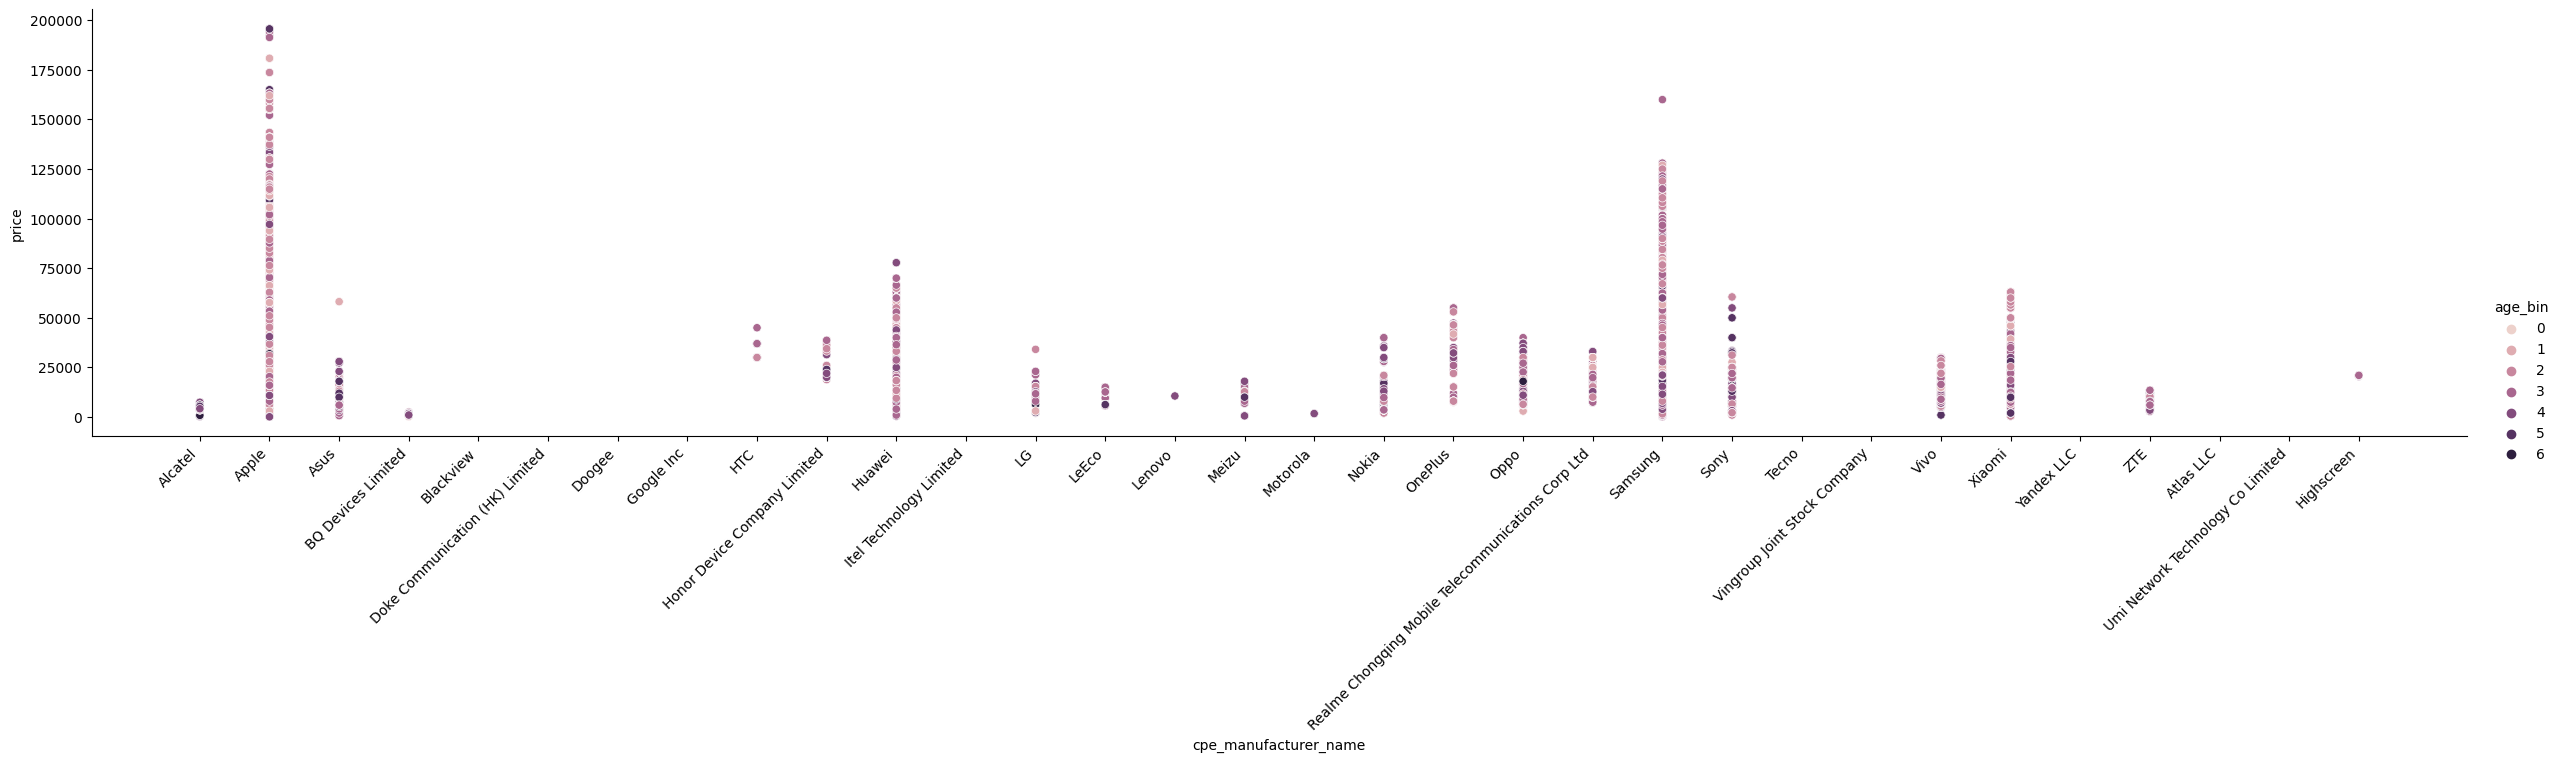

In [46]:
temp('cpe_manufacturer_name', 'price', kind='scatter')

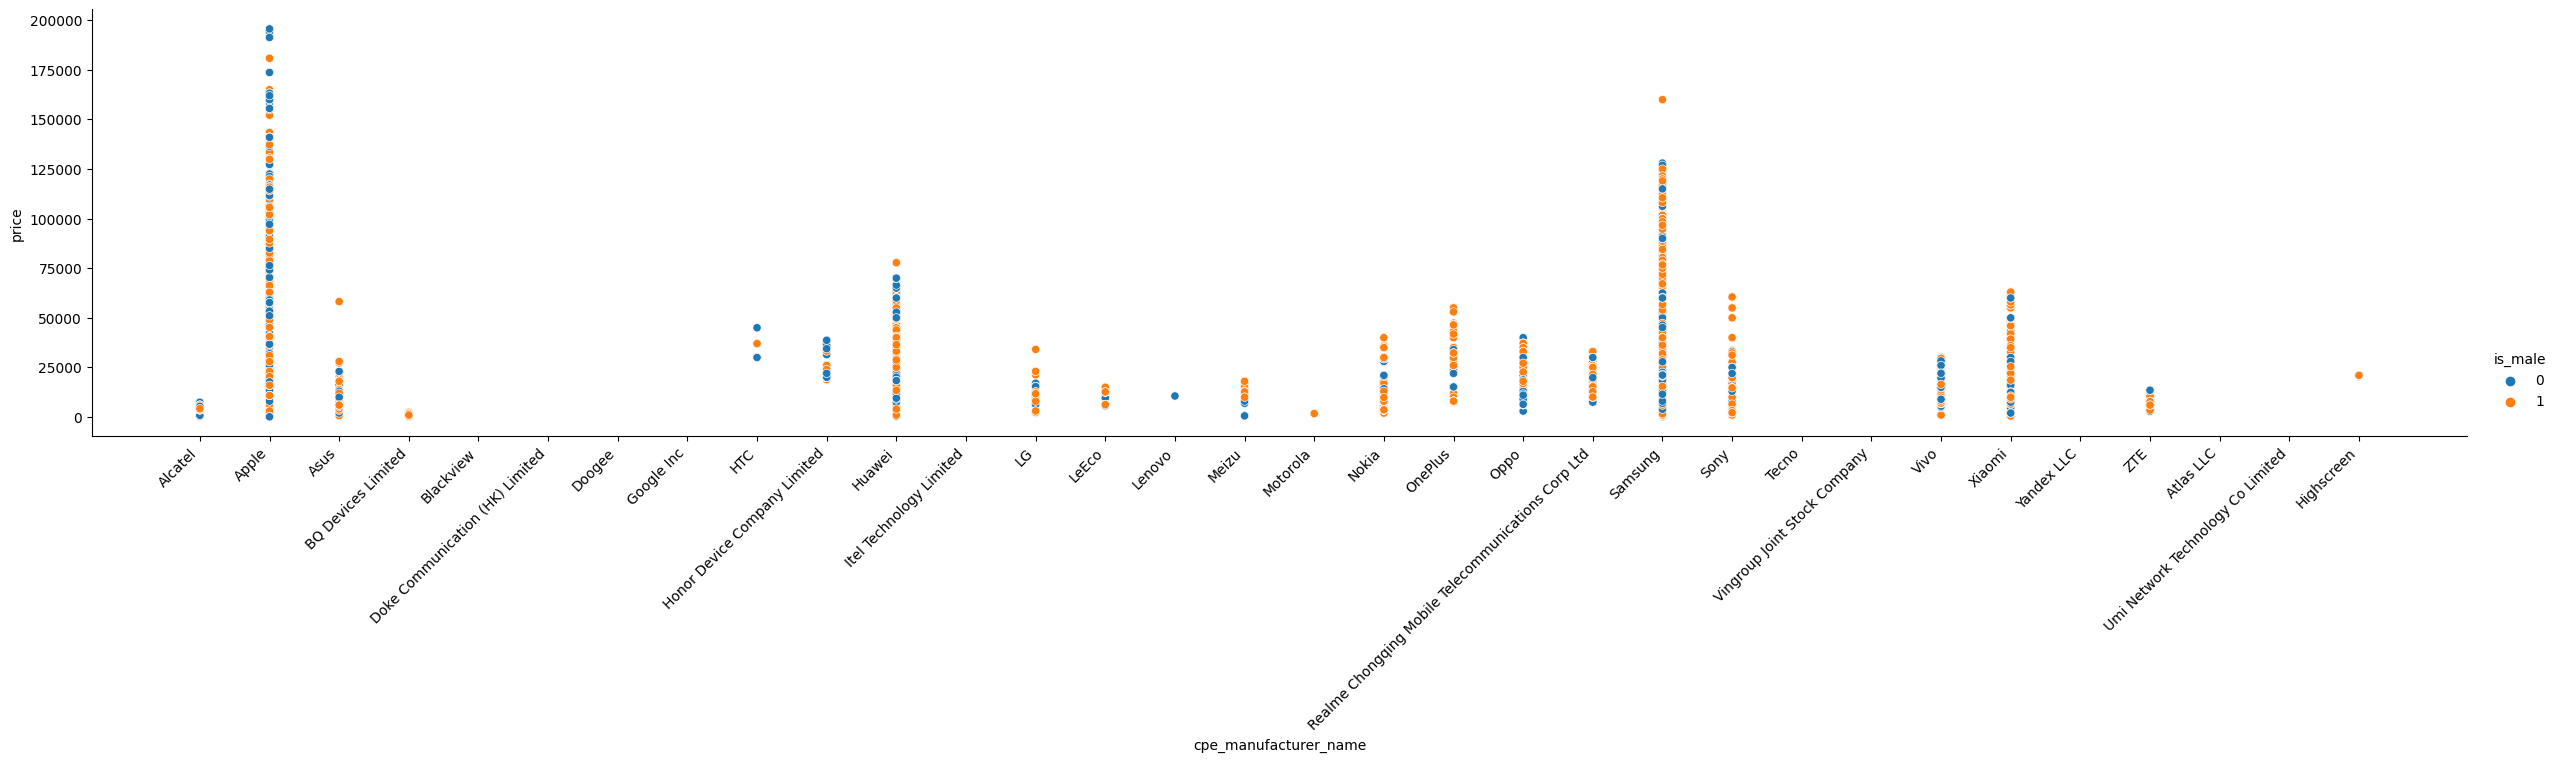

In [56]:
temp('cpe_manufacturer_name', 'price', kind='scatter', hue='is_male')

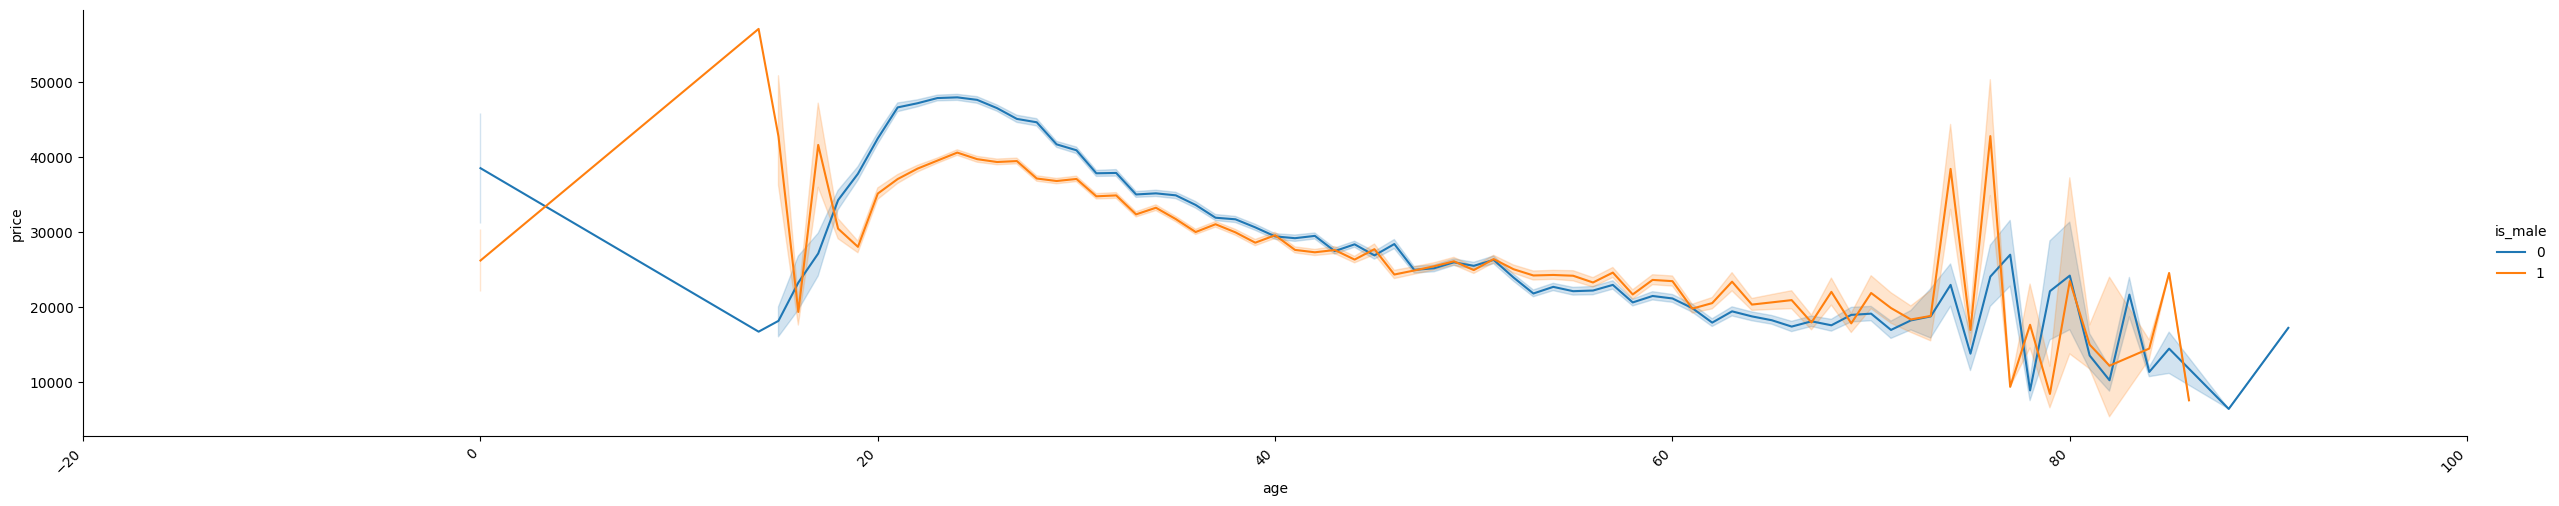

In [57]:
temp('age', 'price', hue='is_male')

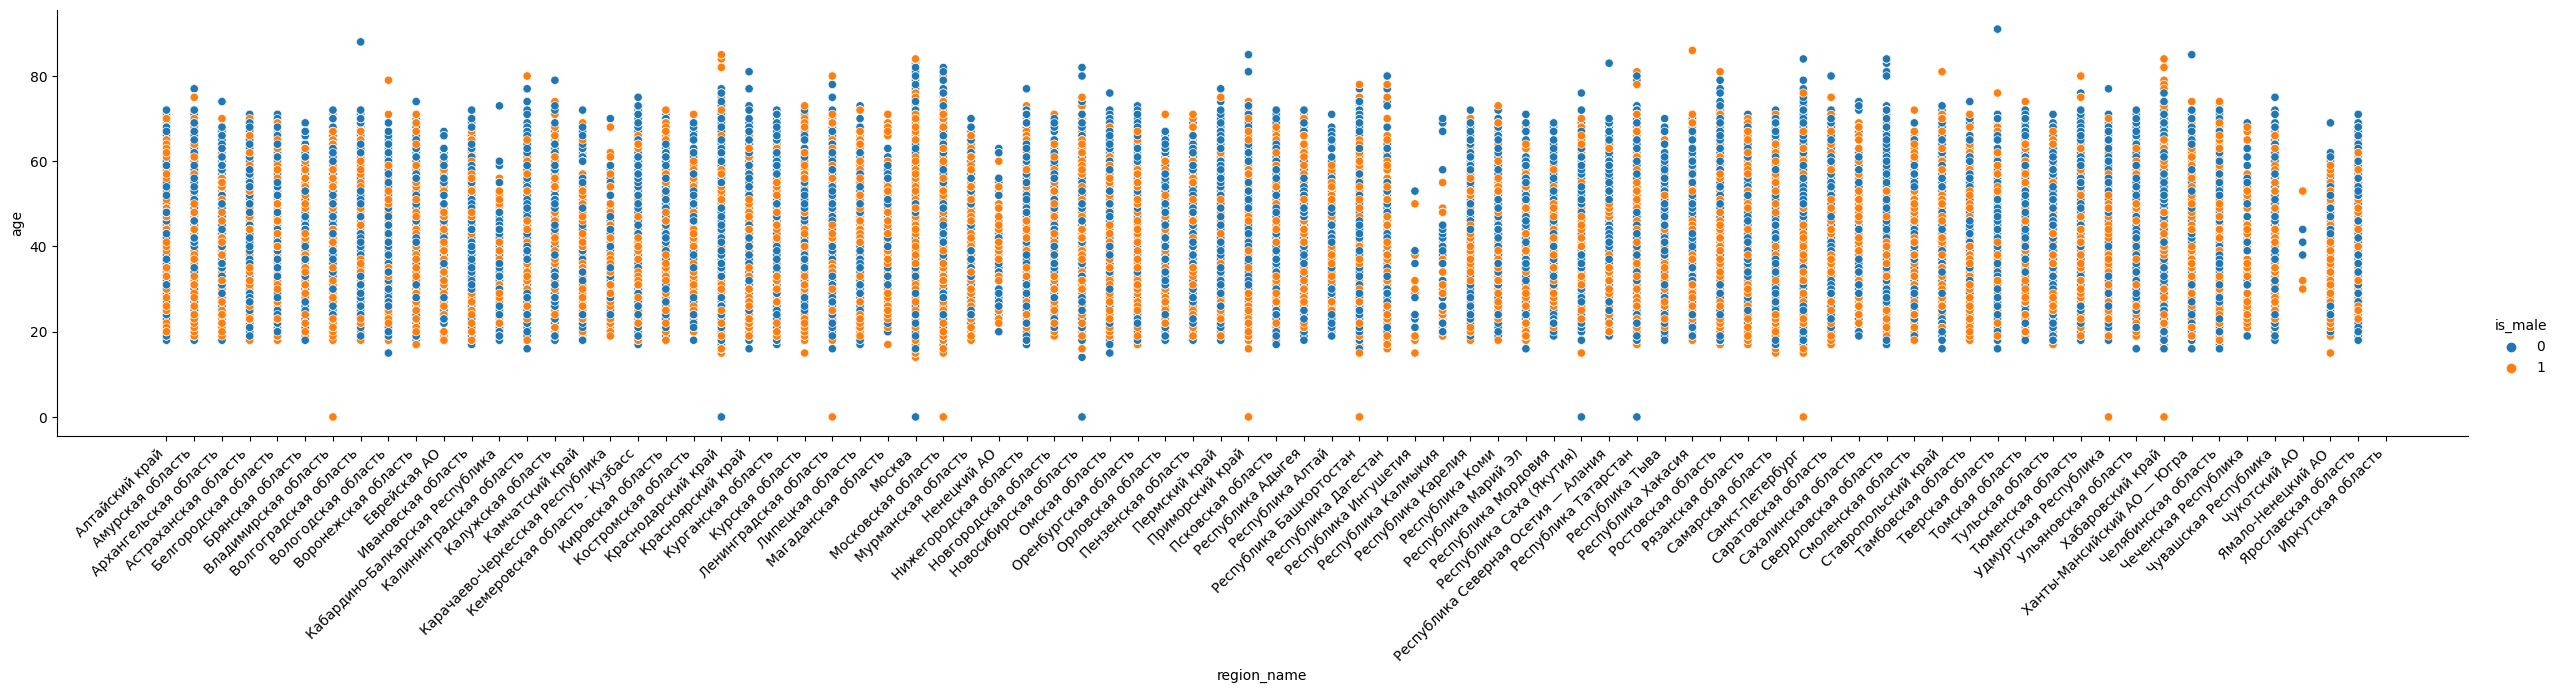

In [53]:
temp('region_name', 'age', kind='scatter', hue='is_male')

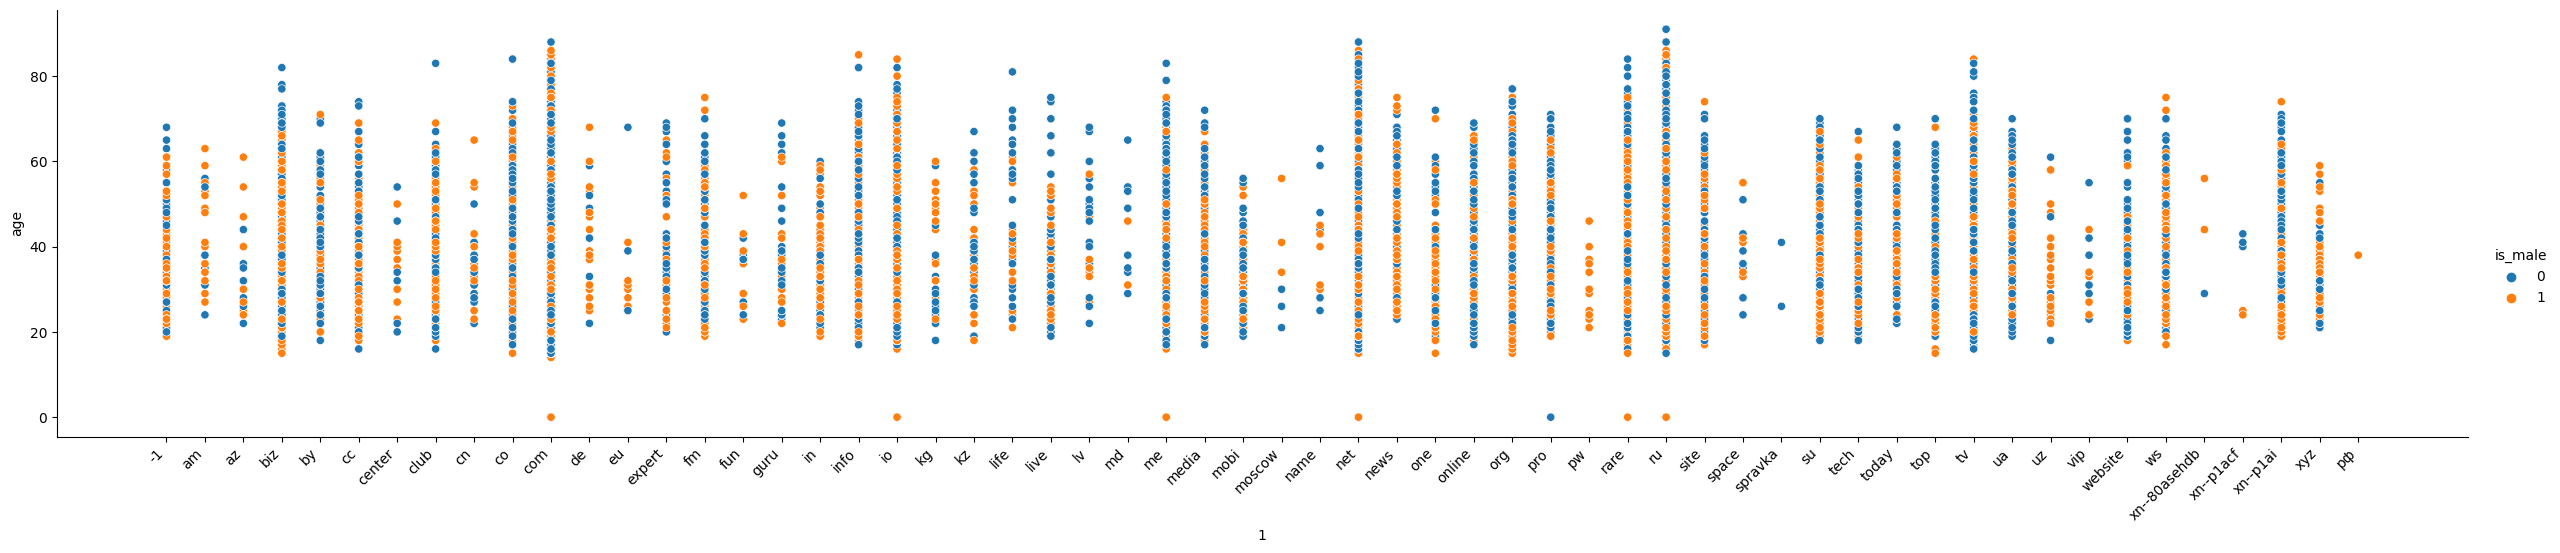

In [58]:
temp(1, 'age', kind='scatter', hue='is_male')

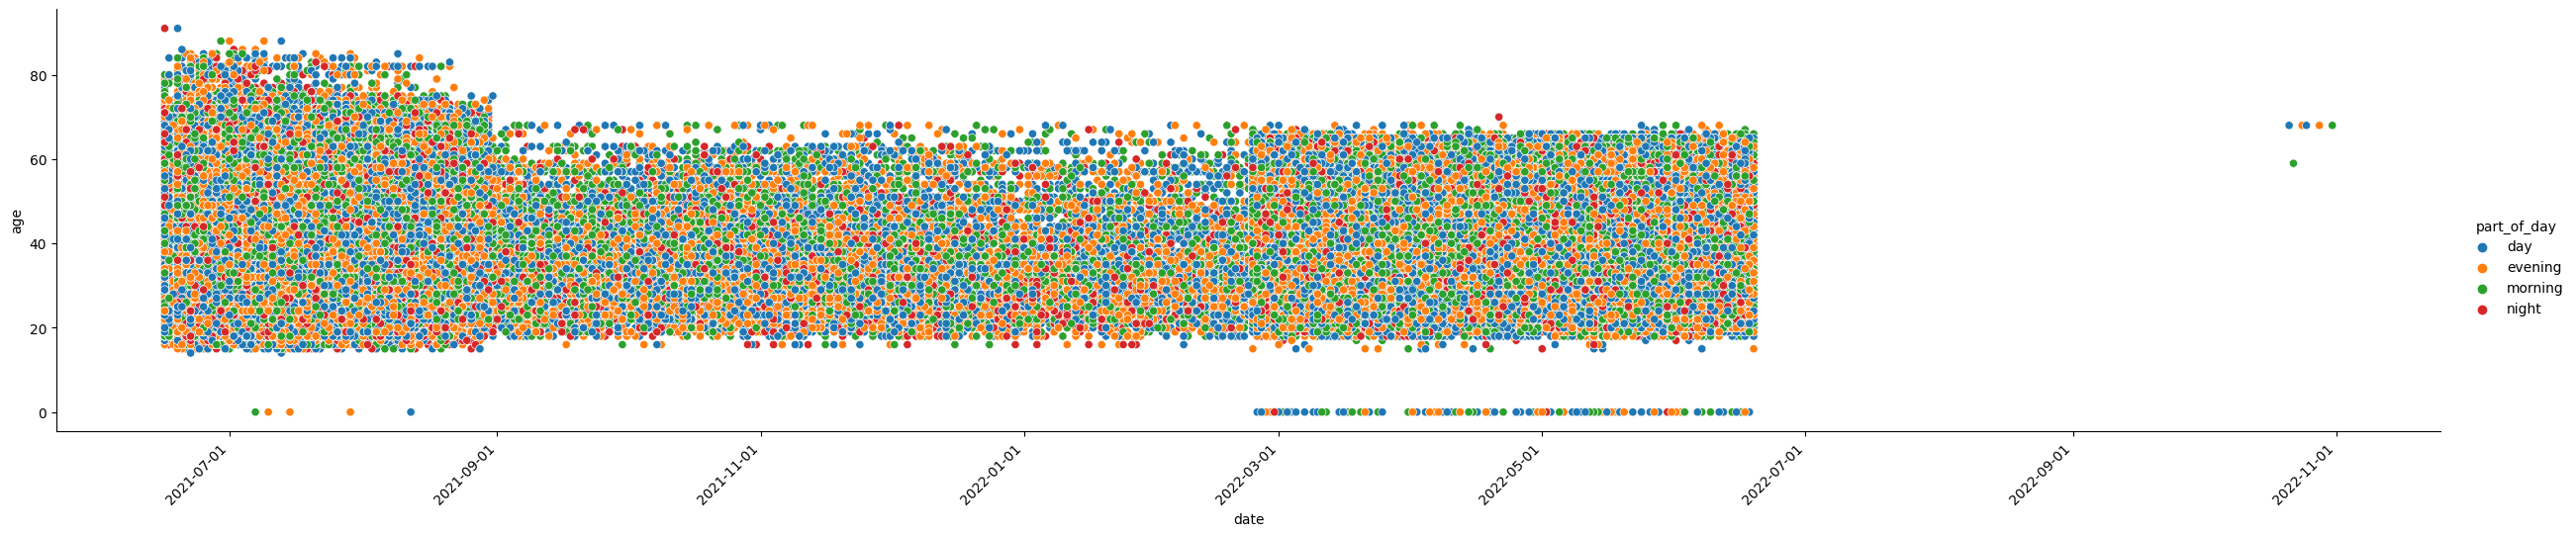

In [61]:
temp('date', 'age', kind='scatter', hue='part_of_day')

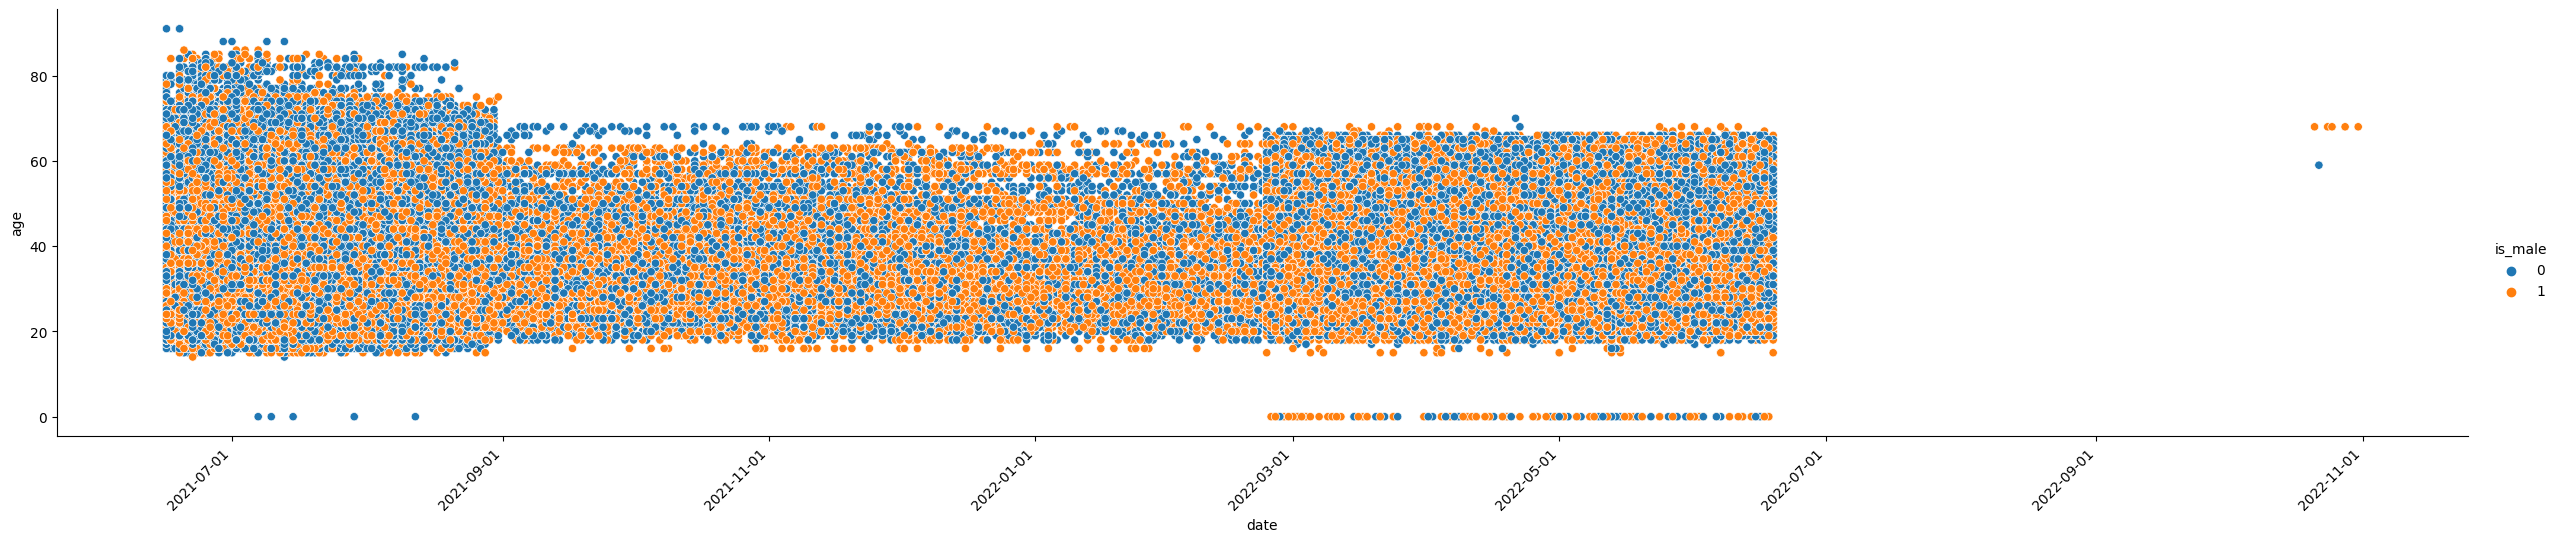

In [59]:
temp('date', 'age', kind='scatter', hue='is_male')

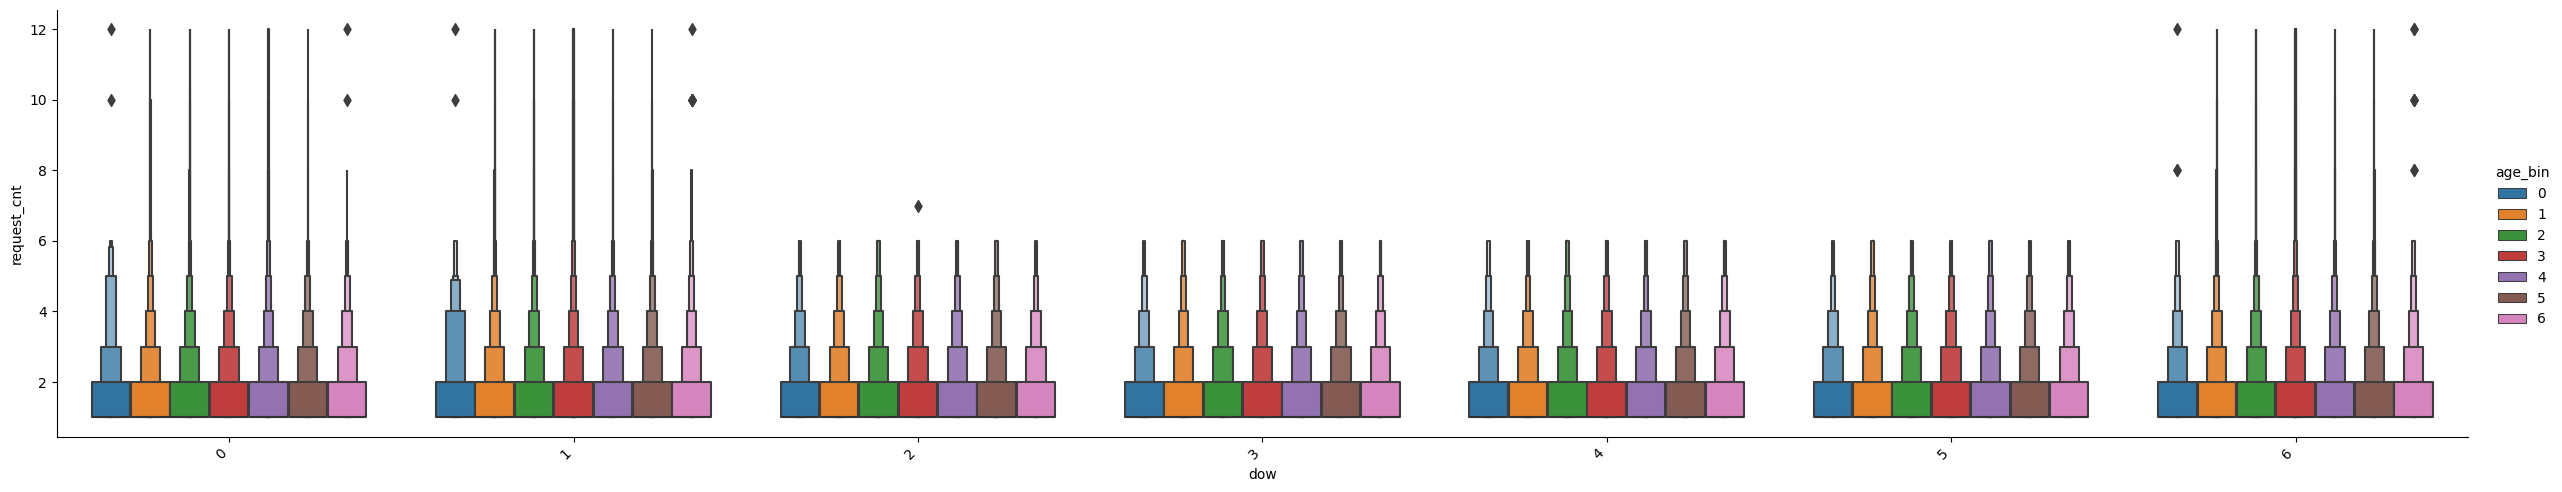

In [65]:
sns.catplot(data=dfs,
            x='dow',
            y='request_cnt',
            hue='age_bin',
            aspect=5,
            kind="boxen").set_xticklabels(rotation=45, horizontalalignment="right");

In [18]:
i

cpe_type_cd  request_cnt        date   price cpe_model_name  \
264981314  smartphone            1  2021-06-23  9121.0       Honor 8A   
264981315  smartphone            3  2021-06-22  9121.0       Honor 8A   
264981316  smartphone            1  2021-06-20  9121.0       Honor 8A   
264981317  smartphone            1  2021-07-10  9121.0       Honor 8A   
264981318  smartphone            2  2021-06-22  9121.0       Honor 8A   
...               ...          ...         ...     ...            ...   
264982055  smartphone            1  2021-06-20  9121.0       Honor 8A   
264982056  smartphone            1  2021-07-02  9121.0       Honor 8A   
264982057  smartphone            1  2021-06-17  9121.0       Honor 8A   
264982058  smartphone            1  2021-06-23  9121.0       Honor 8A   
264982059  smartphone            1  2021-06-25  9121.0       Honor 8A   

          city_name              region_name cpe_manufacturer_name  \
264981314   Ишимбай  Республика Башкортостан                Huawei   
264981315   Ишимбай  Республика Башкортостан                Huawei   
264981316   Ишимбай  Республика Башкортостан                Huawei   
264981317   Ишимбай  Республика Башкортостан                Huawei   
264981318   Ишимбай  Республика Башкортостан                Huawei   
...             ...                      ...                   ...   
264982055   Ишимбай  Республика Башкортостан                Huawei   
264982056   Ишимбай  Республика Башкортостан                Huawei   
264982057   Ишимбай  Республика Башкортостан                Huawei   
264982058   Ишимбай  Республика Башкортостан                Huawei   
264982059   Ишимбай  Республика Башкортостан                Huawei   

          part_of_day dow    1         2 narod ucoz gov turbopages  user_id  
264981314     evening   2  com  buzzoola     0    0   0          0   340654  
264981315     evening   1  net  yastatic     0    0   0          0   340654  
264981316         day   6  com   userapi     0    0   0          0   340654  
264981317     morning   5  net    yandex     0    0   0          0   340654  
264981318         day   1  com        vk     0    0   0          0   340654  
...               ...  ..  ...       ...   ...  ...  ..        ...      ...  
264982055         day   6  net    yandex     0    0   0          0   340654  
264982056     morning   4   ru  sberbank     0    0   0          0   340654  
264982057     evening   3  com   userapi     0    0   0          0   340654  
264982058         day   2  com   userapi     0    0   0          0   340654  
264982059     evening   4  com   userapi     0    0   0          0   340654  

[746 rows x 17 columns]

In [29]:
%%time
df0 = get_common_feature()
df1 = get_common_feature_dict()
df1.df = df0

res = []
temp1 = dfs['user_id'].unique()
temp2 = len(temp1)
for num, user_id in enumerate(temp1):
    i = df1[user_id]
    cd = dict()
    res.append(cd)
    
    d = i['date'].value_counts()
    d = d[d != 0]
    cd['user_id'] = i['user_id'].iloc[0]
    cd['dlen'] = d.shape[0]
    cd['dmin'] = d.min()
    cd['dmean'] = d.mean()
    cd['dmedian'] = d.median()
    cd['dmax'] = d.max()
    
    dow = i.groupby('dow')[1].count()
    cd['we_diff'] = dow.loc[[0, 1, 2, 3, 4]].mean() - dow.loc[[5, 6]].mean()
    
    if num % 10000 == 0 and num > 0:
        print(f"{num:7.0f} {temp2} ({num / temp2:.1%})")

del df0, df1

  10000 102402 (9.8%)
  20000 102402 (19.5%)
  30000 102402 (29.3%)
  40000 102402 (39.1%)
  50000 102402 (48.8%)
  60000 102402 (58.6%)
  70000 102402 (68.4%)
  80000 102402 (78.1%)
  90000 102402 (87.9%)
 100000 102402 (97.7%)
CPU times: total: 6min 11s
Wall time: 7min 33s


dlen


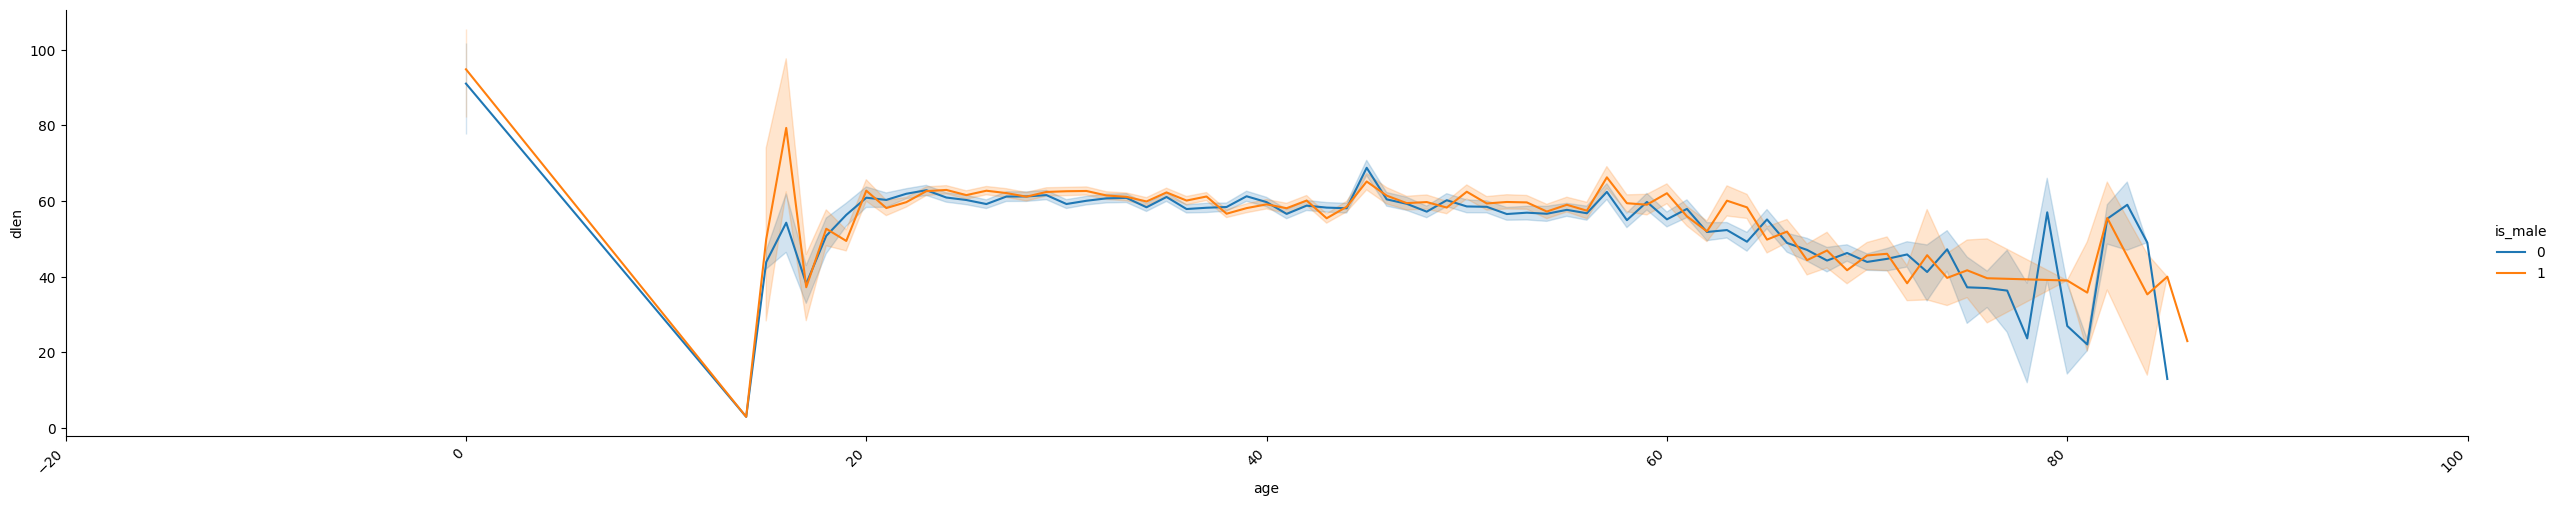

dmin


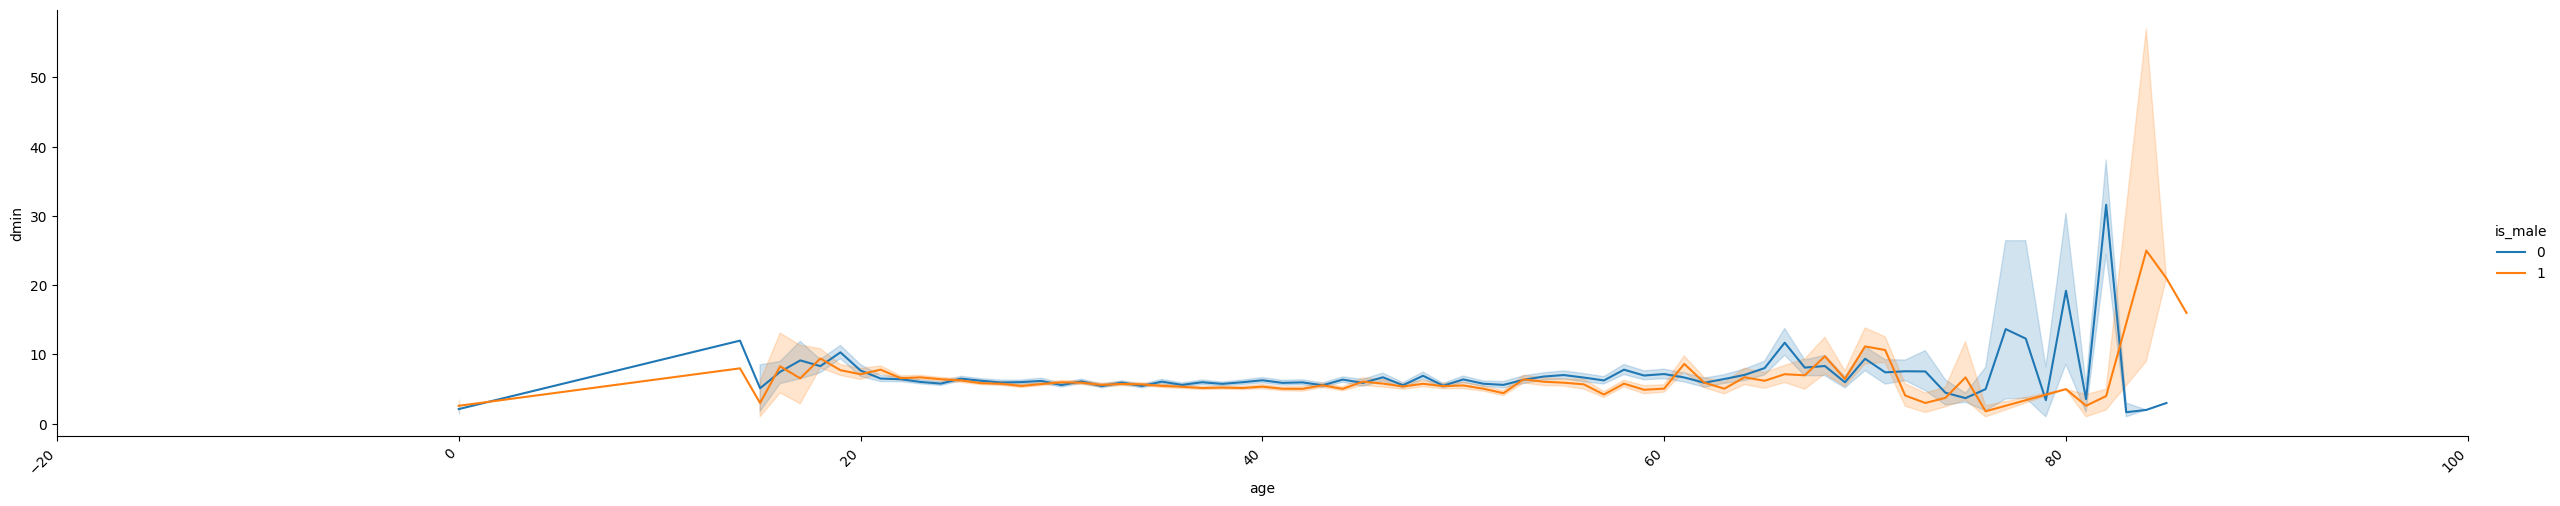

dmean


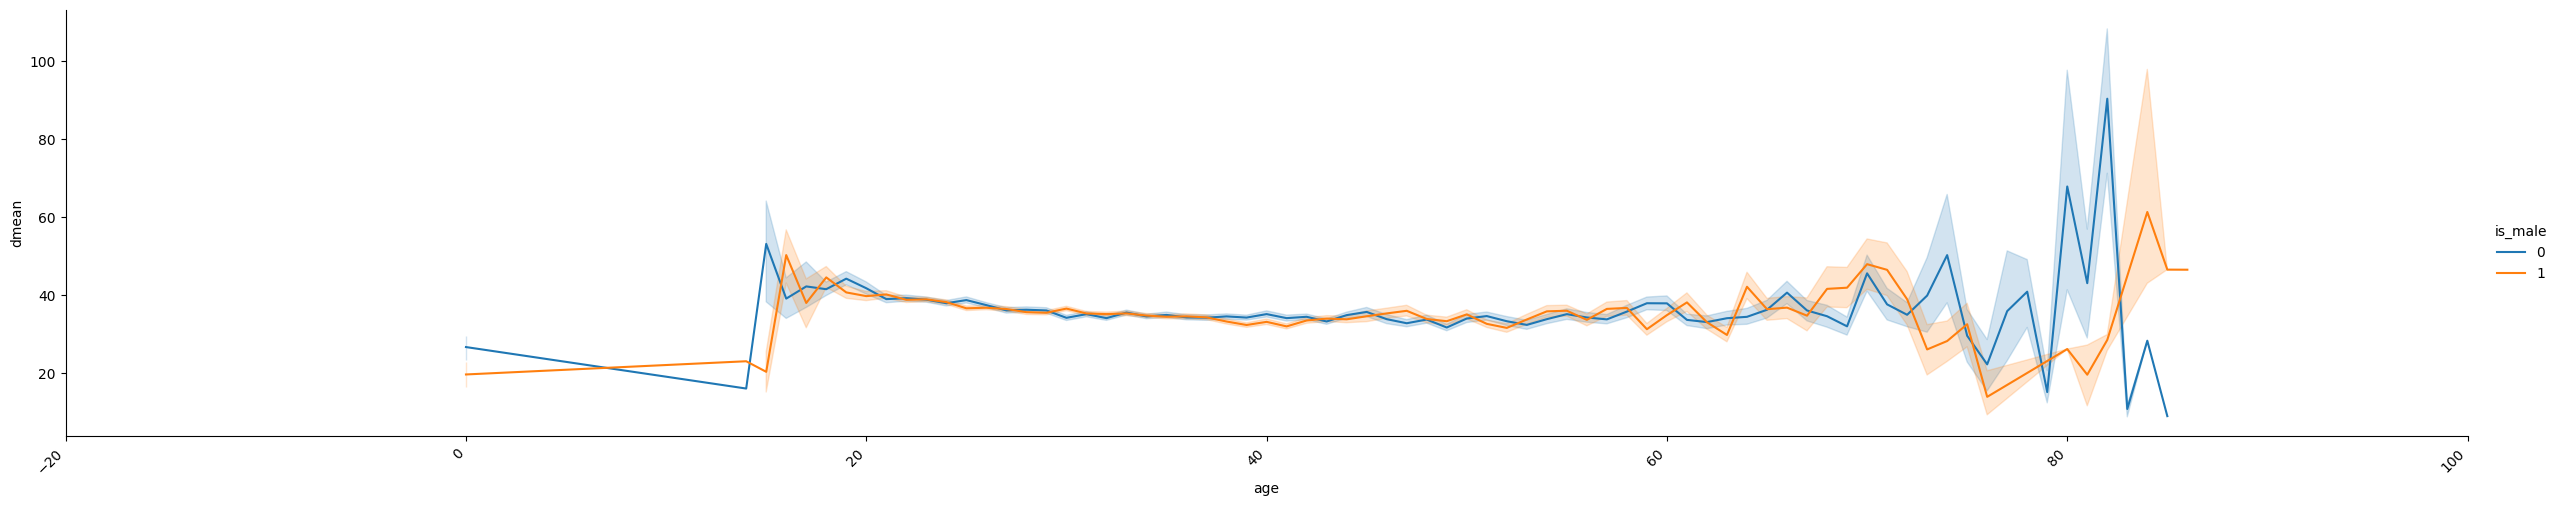

dmedian


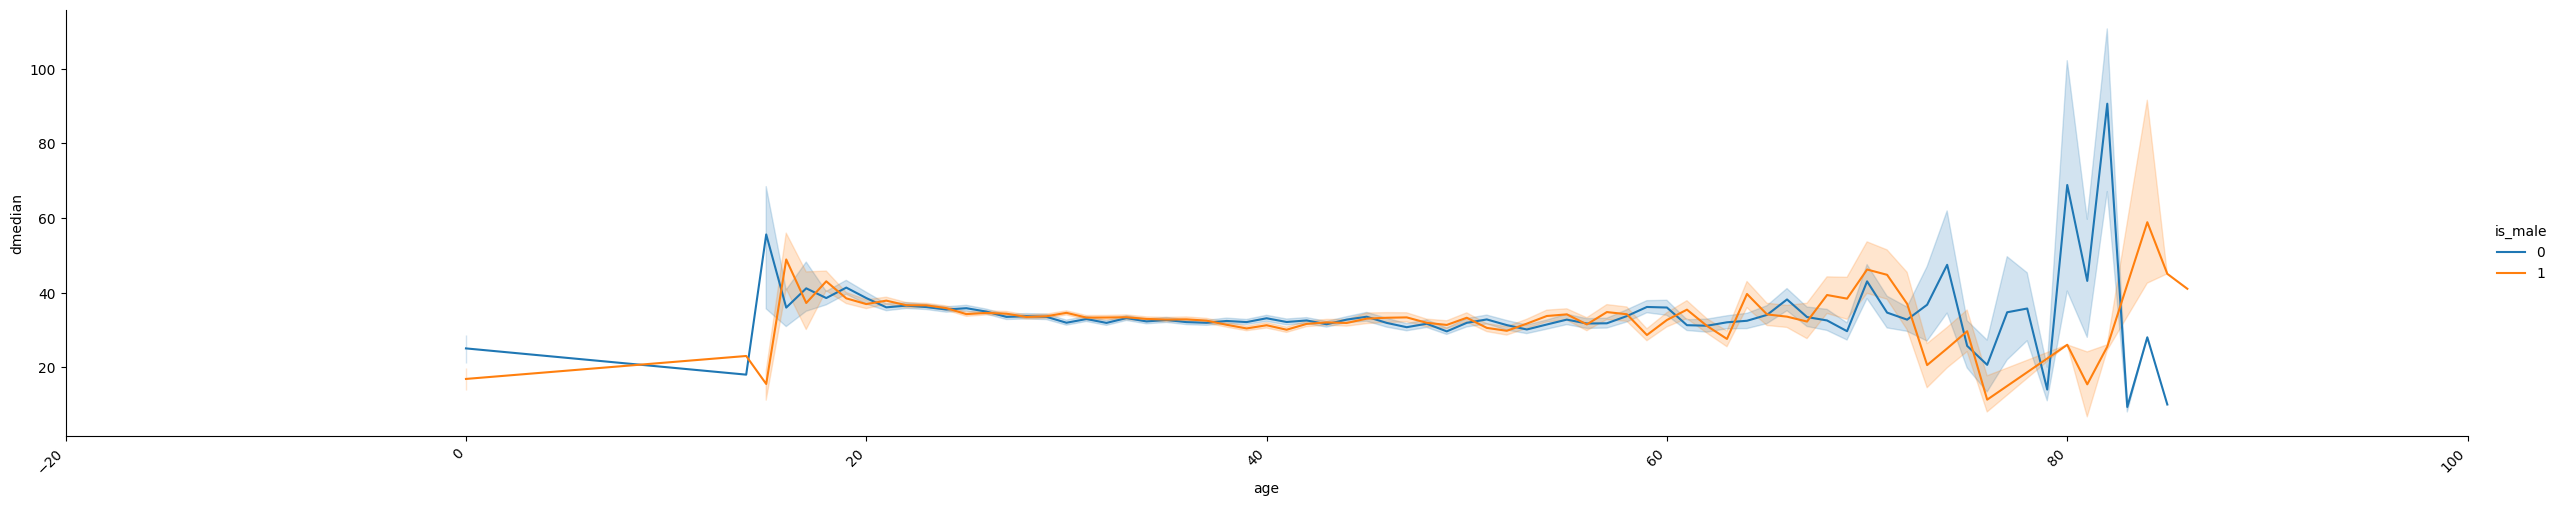

dmax


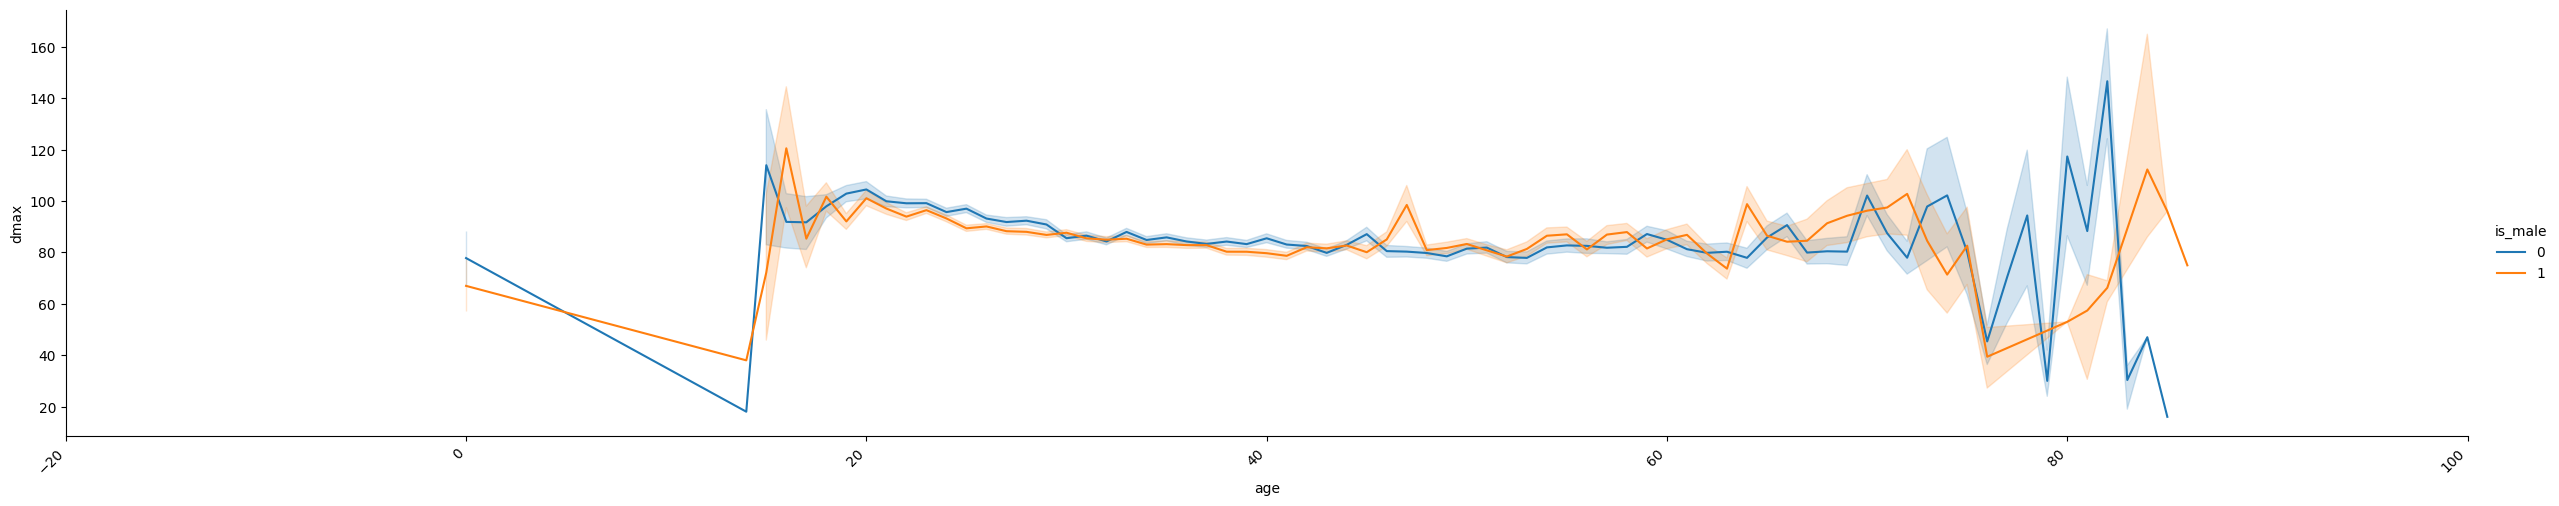

we_diff


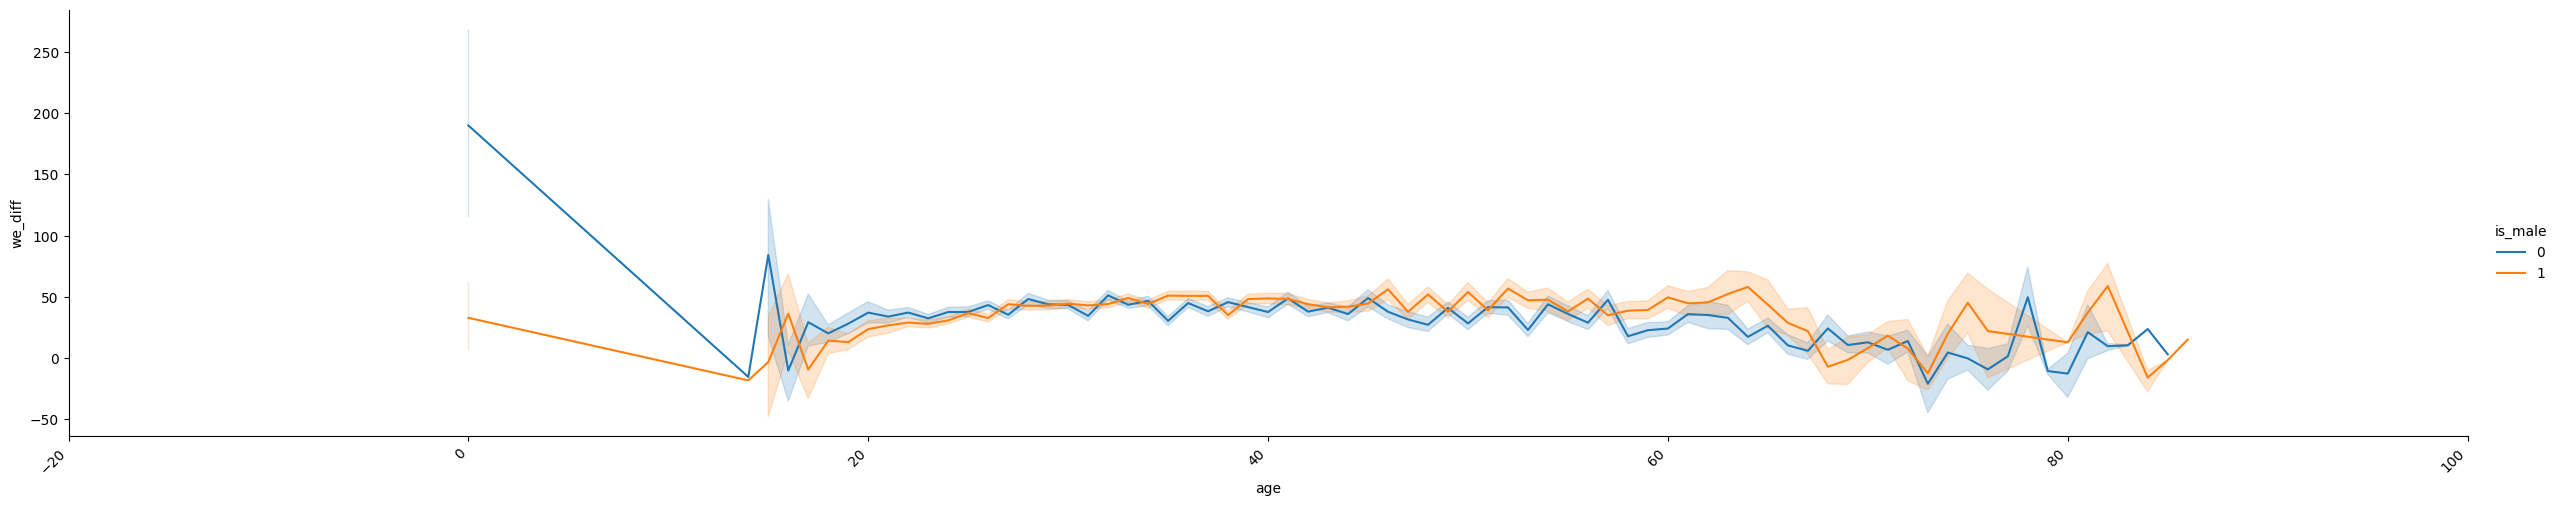

CPU times: total: 28.9 s
Wall time: 29.6 s


In [31]:
%%time
df2 = dfs.merge(pd.DataFrame(res), on='user_id', how='left')
for col in [x for x in res[0].keys() if x != 'user_id']:
    print(col)
    temp('age', col, df=df2, hue='is_male')
    # temp('age', col, df=df2, hue='dow')